In [3]:
import logging
from tqdm import tqdm
import numpy as np
import pandas as pd
from hnmchallenge.constant import *
from hnmchallenge.datasets.all_items_last_month_last_week import AILMLWDataset
from hnmchallenge.models.itemknn.itemknn import ItemKNN
from hnmchallenge.models_prediction.recs_interface import RecsInterface
from hnmchallenge.models_prediction.itemknn_recs import ItemKNNRecs
from hnmchallenge.utils.logger import set_color

In [26]:
map_score=[]
recall_score=[]

In [16]:
dataset=AILMLWDataset()
holdin = dataset.get_holdin()
holdout = dataset.get_holdout()
holdin_t_dat = holdin["t_dat"].max()
holdout_t_dat = holdout["t_dat"].max()

In [17]:
holdin_t_dat

Timestamp('2020-09-15 00:00:00')

In [18]:
holdout_t_dat

Timestamp('2020-09-22 00:00:00')

In [19]:
holdin_ld = set(holdin[holdin["t_dat"]>'2020-09-14 00:00:00']["article_id"].values)
holdout = set(holdout[DEFAULT_ITEM_COL].values)


In [28]:
print("One day intersection")
print(len(holdin_ld))
len(holdin_ld.intersection(holdout))

One day intersection
7617


6919

In [26]:
holdin_lw = set(holdin[holdin["t_dat"]>'2020-09-07 00:00:00']["article_id"].values)

In [29]:
print("One week intersection")
print(len(holdin_lw))
len(holdin_lw.intersection(holdout))

One week intersection
19333


14236

In [15]:
full_data[full_data["t_dat"]>'2020-09-14 00:00:00']["article_id"].nunique()a

7617

In [40]:
t_dat1=t_dat - pd.to_timedelta(2a+1, unit="D")

In [42]:
print(t_dat1)
cut=[12,50]#,100]#,200]

2020-09-12 00:00:00


In [31]:
dataset=AILMLWDataset()
map_score=[]
recall_score=[]
for j in cut:   
    x=[]
    y=[]
    for i in tqdm(range(2)):
        full_data = dataset.get_full_data()
        t_dat = full_data["t_dat"].max()
        t_dat1=t_dat - pd.to_timedelta(i+1, unit="D")
        candidate_items = full_data[full_data["t_dat"] >= t_dat1][["article_id"]].drop_duplicates()
        candidate_items = candidate_items.values.squeeze()
        TW = True
        REMOVE_SEEN = False
        FC = True
        dataset=AILMLWDataset()
        for kind in ["train"]:  # , "full"]:        # for kind in ["train", "full"]:
            rec_ens = ItemKNNRecs(
                kind=kind,
                cutoff=j,
                time_weight=TW,
                remove_seen=REMOVE_SEEN,
                dataset=dataset,
                filter_on_candidates=candidate_items,
            )
            score, recall=rec_ens.eval_recommendations()
            x.append(score)
            y.append(recall)
    map_score.append(x)
    recall_score.append(y)

  0%|          | 0/2 [00:00<?, ?it/s]

hnmchallenge/models_prediction/evaluation_logs/ItemKNN_tw_True_rs_False__17_07_2022__15_46_37.log
Computing similarity...


Done: 100%|██████████| 104547/104547 [00:03<00:00, 28211.72it/s]


  0%|          | 0/4 [00:01<?, ?it/s]

Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
63412
63412


 50%|█████     | 1/2 [02:44<02:44, 164.45s/it]

hnmchallenge/models_prediction/evaluation_logs/ItemKNN_tw_True_rs_False__17_07_2022__15_49_22.log
Computing similarity...


Done: 100%|██████████| 104547/104547 [00:03<00:00, 27507.72it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
63412
63412


  0%|          | 0/2 [00:00<?, ?it/s]

hnmchallenge/models_prediction/evaluation_logs/ItemKNN_tw_True_rs_False__17_07_2022__15_52_00.log
Computing similarity...


Done: 100%|██████████| 104547/104547 [00:02<00:00, 37490.07it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
63412
63412


 50%|█████     | 1/2 [02:50<02:50, 170.94s/it]

hnmchallenge/models_prediction/evaluation_logs/ItemKNN_tw_True_rs_False__17_07_2022__15_54_51.log
Computing similarity...


Done: 100%|██████████| 104547/104547 [00:03<00:00, 27330.12it/s]


  0%|          | 0/4 [00:01<?, ?it/s]

Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
Filtering scores on candidates...
63412
63412


100%|██████████| 2/2 [05:37<00:00, 168.70s/it]


In [32]:
print(map_score)

[[0.02876718492647003, 0.028658134749787127], [0.030792360285050082, 0.03069527910866924]]


In [34]:
from pathlib import Path
import os

DATASET_NAME = "AILMLW_dataset"
_DATA_PATH = Path(Path.home() / os.environ.get("DATA_PATH"))
_DATASET_PATH = _DATA_PATH / "datasets" / DATASET_NAME
_HOLDIN_PATH = Path(_DATASET_PATH / Path("map_score.feather"))
df={'MAP@12':map_score[0], 'recall@12':recall_score[0], 'MAP@50':map_score[1], 'recall@50':recall_score[1] }
article_score=pd.DataFrame(df)
article_score.to_feather(_HOLDIN_PATH)

In [36]:
article_score

,MAP@12,recall@12,MAP@50,recall@50
0,0.028767,0.058788,0.030792,0.097785
1,0.028658,0.058517,0.030695,0.097736


In [5]:

from pathlib import Path
import os
import pandas as pd

DATASET_NAME = "AILMLW_dataset"
_DATA_PATH = Path(Path.home() / os.environ.get("DATA_PATH"))
_DATASET_PATH = _DATA_PATH / "datasets" / DATASET_NAME
_HOLDIN_PATH = Path(_DATASET_PATH / Path("map_score.feather"))
features = pd.read_feather(dataset._DATASET_PATH / f"map_score.feather")

In [6]:
features

,MAP@12,recall@12,MAP@50,recall@50,MAP@100,recall@100,MAP@200,recall@200
0,0.028329,0.057724,0.030317,0.096392,0.030825,0.124022,0.031175,0.160765
1,0.028309,0.057478,0.030307,0.096118,0.030810,0.123756,0.031150,0.159473
2,0.028232,0.057155,0.030224,0.095772,0.030721,0.123066,0.031055,0.158041
3,0.028114,0.056778,0.030096,0.095253,0.030586,0.122197,0.030916,0.156833
4,0.028016,0.056555,0.029987,0.094889,0.030474,0.121739,0.030802,0.156075
...,...,...,...,...,...,...,...,...
95,0.027305,0.053975,0.029061,0.088475,0.029523,0.114041,0.029816,0.145232
96,0.027304,0.053975,0.029059,0.088462,0.029521,0.114020,0.029814,0.145230
97,0.027304,0.053975,0.029057,0.088429,0.029519,0.113993,0.029813,0.145201
98,0.027303,0.053973,0.029056,0.088410,0.029518,0.113974,0.029811,0.145184


In [7]:
features["MAP@50"].max()

0.03031746357957068

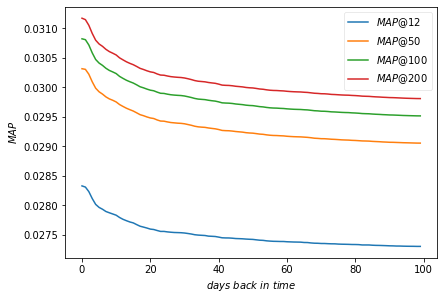

In [8]:
from hnmchallenge.matplotlib_utils.setup_plot import setup_plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#setup_plot(200, fig_ratio=0.5, font_size=8)
x = list(features.index.values)

fig, ax = plt.subplots()

ax= sns.lineplot(x=x, y=list(features["MAP@12"]),label="$MAP@12$")
ax3= sns.lineplot(x=x, y=list(features["MAP@50"]),label="$MAP@50$")
ax4= sns.lineplot(x=x, y=list(features["MAP@100"]),label="$MAP@100$")
ax1 = sns.lineplot(x=x, y=list(features["MAP@200"]),label="$MAP@200$")
#ax2 = sns.lineplot(x=x, y=1,label="$f(x)=1$")
#sns.lineplot(x=x, y=1/(np.exp(-1+x)),label="$f(x)=1/exp(x-1)$")

#plt.gca().legend(labels=["$f(x)=1/x^{3}$", "_", "$f(x)=1/x^{2}$", "_","$f(x)=1/x$", "_","$f(x)=(730-x)/730$", "_","$f(x)=1$", "_","$f(x)=exp(x-1)$"])
plt.gca().get_legend().get_frame().set_linewidth(0.5)
plt.xlabel("$days~back~in~time$")
plt.ylabel("$MAP$")

plt.tight_layout(pad=0.1, w_pad=0.0, h_pad=0.0)